In [1]:
#Pandas, Numpy, Scipy, Matplotlib, Seaborn, Plotly
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import statsmodels.api as sm

In [2]:
data = pd.read_csv('train.csv')

## Data characteristics

In [3]:
data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
data.shape

(1460, 81)

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Data cleaning

In [12]:
data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
Electrical          1
SalePrice           0
ExterCond           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
BsmtCond            0
Foundation          0
BsmtQual            0
YearBuilt           0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
YearRemodAdd        0
OverallQual         0
OverallCond         0
BsmtUnfSF           0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
WoodDeckSF          0
EnclosedPorch       0
Heating             0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
GarageYrBlt         0
GarageType          0
FireplaceQu         0
Fireplaces          0
SaleCondit

In [8]:
#Cambiemos los NA restantes por algún string relevante
data.FireplaceQu = data.FireplaceQu.replace(np.NaN, 'NoFireplace')
data.LotFrontage = data.LotFrontage.replace(np.NaN, 0)
data.GarageCond = data.GarageCond.replace(np.NaN, 'NoGarage')
data.GarageType = data.GarageType.replace(np.NaN, 'NoGarage')
data.GarageYrBlt = data.GarageYrBlt.replace(np.NaN, 'NoGarage')
data.GarageFinish = data.GarageFinish.replace(np.NaN, 'NoGarage')
data.GarageQual = data.GarageQual.replace(np.NaN, 'NoGarage')
data.BsmtExposure = data.BsmtExposure.replace(np.NaN, 'NoBsmt')
data.BsmtFinType2 = data.BsmtFinType2.replace(np.NaN, 'NoBsmt')
data.BsmtFinType1 = data.BsmtFinType1.replace(np.NaN, 'NoBsmt')
data.BsmtCond = data.BsmtCond.replace(np.NaN, 'NoBsmt')
data.BsmtQual = data.BsmtQual.replace(np.NaN, 'NoBsmt')
data.MasVnrArea = data.MasVnrArea.replace(np.NaN, 0)
data.MasVnrType = data.MasVnrType.replace(np.NaN, 'None')

#Electrical          1

## Data manipulation

In [9]:
#Dedibo a que algunas columnas están llenas de NaN (del 80% al 99.5%), podemos asumir inicialmente 
#que no son características realmente determinantes para poner el precio
data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


## Data visualization

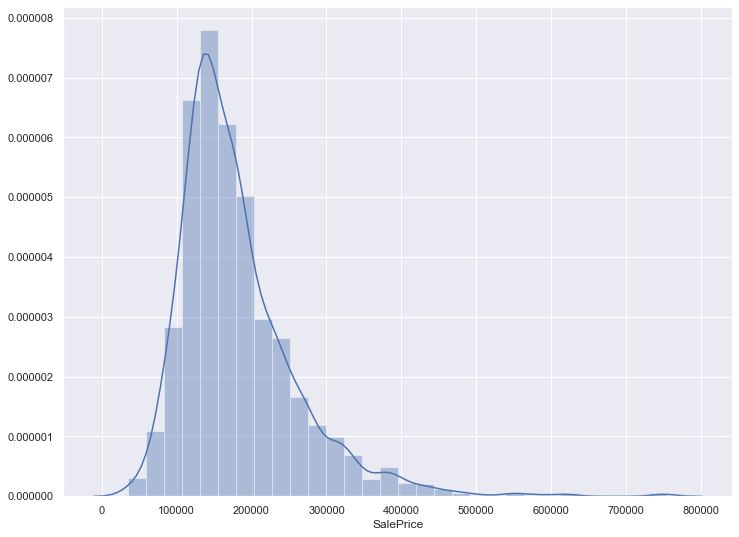

In [22]:
#Veamos la distribución de la variable objetivo, el precio
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(data.SalePrice, bins=30)
plt.show()

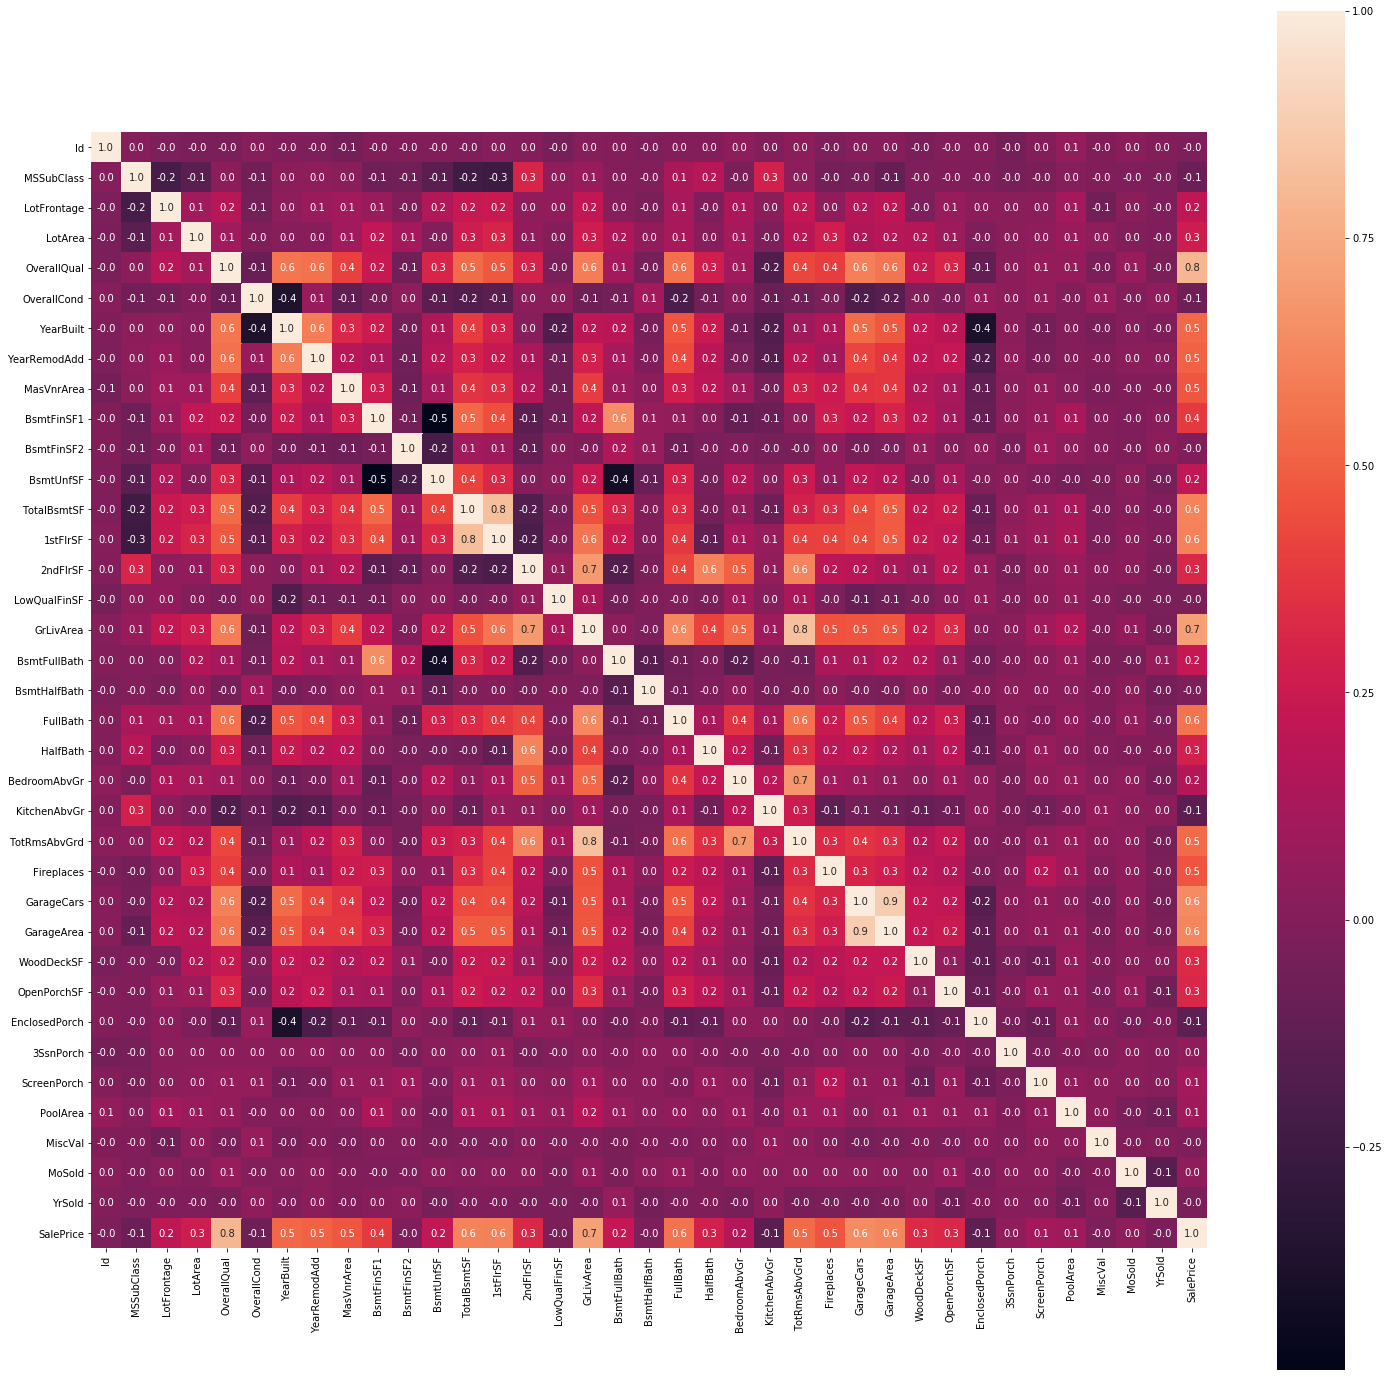

In [10]:
#Veamos la correlación entre las variables numéricas en un mapa de calor
#en especial con el precio de venta
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(method='pearson'), square= True, fmt='.1f', annot=True)
plt.show()

In [19]:
data.SalePrice.corr(data.LotFrontage, method='pearson')

0.2096239447994839

Podemos observar que las correlaciones más fuertes son en las columnas: OverallQual 0.8, GrLivArea 0.7, TotalBsmtSF 0.6, 1stFlrSF 0.6, FullBath 0.6, GarageCars 0.6 y  GaregeArea 0.6.  
Considero las dos últimasvariables como iguales para el análisis pues tienen una correlación de 0.9
entre ellas.
Sin embargo es curioso notar que mientras OverallQual tiene 0.8 de correlación con el precio, pero OverallCond tiene un -0,1 de correlación.

## Statistical analysis

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

### Normalización de los datos

In [24]:
#Quedémonos solo con las columnas numéricas
data_num = data._get_numeric_data()

In [25]:
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [26]:
data_rescaled=StandardScaler().fit_transform(data_num)

In [27]:
pca=PCA()
pca.fit(data_rescaled)
pca.explained_variance_ratio_

array([2.02204780e-01, 8.55902942e-02, 5.84995817e-02, 5.54459870e-02,
       3.99977214e-02, 3.21564683e-02, 3.15502145e-02, 3.04693000e-02,
       2.95830929e-02, 2.91153774e-02, 2.87885923e-02, 2.78261320e-02,
       2.74764570e-02, 2.66911197e-02, 2.58156153e-02, 2.53855602e-02,
       2.37190776e-02, 2.28866150e-02, 2.19046045e-02, 2.10635497e-02,
       1.97219579e-02, 1.89988605e-02, 1.74683813e-02, 1.65227231e-02,
       1.54459745e-02, 1.22407390e-02, 1.06651600e-02, 8.41701755e-03,
       7.80726873e-03, 7.03115316e-03, 5.23966685e-03, 4.26786324e-03,
       3.86140860e-03, 3.49005988e-03, 2.65162515e-03, 3.98778614e-32,
       8.85776384e-34])

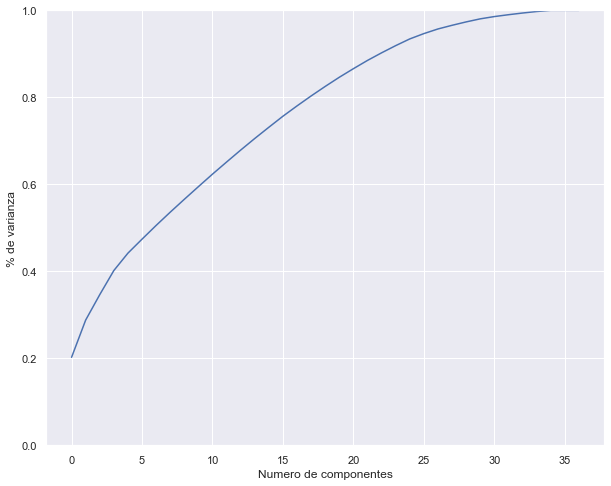

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% de varianza')
plt.ylim([0,1])
plt.show();

In [29]:
pca=PCA(n_components=17)
df=pd.DataFrame(pca.fit_transform(data_rescaled))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.359584,0.568148,-1.160456,-1.938062,0.656591,-1.348819,-0.689805,-0.020299,-1.324896,0.086681,0.773169,-0.560884,0.183099,0.833547,0.515666,-1.266501,-0.541735
1,0.016542,-1.225506,1.055288,0.125491,-1.943243,0.235018,3.272826,1.166670,-1.053502,-0.699939,0.387055,0.039276,2.112144,-0.405326,-0.426655,-1.772414,-0.379658
2,1.616367,0.397557,-1.152547,-1.411673,-0.019450,0.176883,-0.357838,0.134891,-1.132720,0.201289,0.724231,-0.272734,-1.045888,0.388512,0.532013,-0.819581,-0.558217
3,-0.549043,1.001456,1.466993,0.103513,0.180683,-0.808297,-1.795198,0.952543,-1.738394,-0.612791,0.459320,2.823232,-0.611357,-1.145194,2.881887,-0.521810,0.127673
4,4.385952,1.101073,-0.395713,-1.303614,0.076417,0.607203,0.175683,0.442040,-1.295782,-0.415847,0.328264,-0.471752,-1.602253,0.220352,0.311343,-1.362929,-0.146762


## Conclusions